In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import plotly.express as px

In [2]:
df = pd.read_csv('https://github.com/prathyuma-08/Sentiment-Analysis/files/9386230/Sentiment_analysis.csv')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
#To find if there are any null values 
print(df.isnull().sum())

 Review    0
Liked      0
dtype: int64


In [3]:
liked = df["Liked"].value_counts()
numbers = liked.index
quantity = liked.values
figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


df[" Review"] = df[" Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df.head()

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


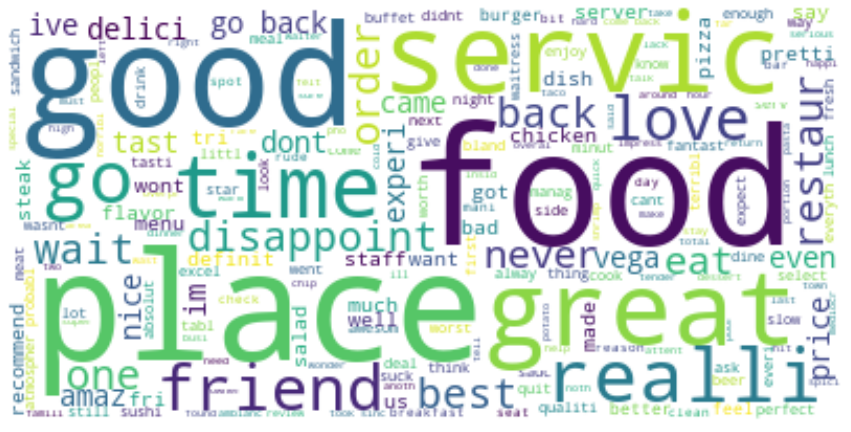

In [6]:
text = " ".join(i for i in df[" Review"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df[" Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df[" Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df[" Review"]]
df = df[[" Review", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  Positive  Negative  \
0                                     wow love place     0.889     0.000   
1                                         crust good     0.744     0.000   
2                                 tasti textur nasti     0.000     0.000   
3  stop late may bank holiday rick steve recommen...     0.566     0.133   
4                            select menu great price     0.577     0.000   

   Neutral  
0    0.111  
1    0.256  
2    1.000  
3    0.301  
4    0.423  
